In [0]:
import seaborn as sns
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import csv
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets,linear_model, preprocessing,utils
from sklearn.metrics import mean_squared_error,r2_score
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from matplotlib.pyplot import figure, show
from keras.layers import Conv1D, Conv2D, MaxPooling2D 
import keras
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten ,Dropout
import cv2
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.callbacks import EarlyStopping
from keras import optimizers
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
import glob
from keras.layers import concatenate
from keras.models import Model
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from IPython.display import Image

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
new_images=[]
for number in range(1, 536):
    for path in glob.glob("/content/drive/My Drive/Houses Dataset/" + str(number) + "_bathroom.jpg"):
        if os.path.isfile(path):
            new_images.append(path)

In [0]:
img= pd.DataFrame(new_images,columns = ['bathroom_img'])

In [0]:
bedroom_images = []
for number in range(1, 536):
    for path in glob.glob("/content/drive/My Drive/Houses Dataset/" + str(number) + "_bedroom.jpg"):
        if os.path.isfile(path):
            bedroom_images.append(path)

In [0]:
img['bedroom_img']=bedroom_images

In [0]:
frontal_images = []
for number in range(1, 536):
    for path in glob.glob("/content/drive/My Drive/Houses Dataset/" + str(number) + "_frontal.jpg"):
        if os.path.isfile(path):
            frontal_images.append(path) 

In [0]:
img['frontal_img']=frontal_images

In [0]:
kitchen_images = []
for number in range(1, 536):
    for path in glob.glob("/content/drive/My Drive/Houses Dataset/" + str(number) + "_kitchen.jpg"):
        if os.path.isfile(path):
            kitchen_images.append(path)

In [0]:
img['kitchen_img']=kitchen_images

In [0]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import os

In [0]:
from google.colab import files
uploaded = files.upload()

Saving HousesInfo.txt to HousesInfo.txt


# Data-PreProcessing

In [0]:
cols=["Bedrooms","Bathrooms","area","zipcode","price"]

import io
df = pd.read_csv(io.BytesIO(uploaded['HousesInfo.txt']),sep=" ", header=None , names=cols)

df.shape

(535, 5)

# Removing outliers from text

In [0]:
df=df[df['price'].between(50000,900000, inclusive=True)]

In [0]:
df.shape

(453, 5)

In [0]:
print(df.columns)

Index(['Bedrooms', 'Bathrooms', 'area', 'zipcode', 'price'], dtype='object')


# Splitting and Normalizing Text data

In [0]:
Y=df['price']

In [0]:
ytrain=Y[0:362]

In [0]:
ytrain.shape

(362,)

In [0]:
ytest=Y[362:453]

In [0]:
ytest.shape

(91,)

In [0]:
ytrain=np.asarray(ytrain)
ytest=np.asarray(ytest)

In [0]:
ytrain.shape

(362,)

In [0]:
X=df.drop(columns='price')
X=pd.get_dummies(X, columns=['zipcode'])
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X.iloc[:,0:3])
X.iloc[:,0:3] = scaler.transform(X.iloc[:,0:3])
X.head()

#check for missing values
from sklearn.impute import SimpleImputer 
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
imputer=imputer.fit(X)
X=imputer.transform(X)
xtrain = X[0:362,:]
xtest= X[362:453,:]

In [0]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(362, 44)
(91, 44)
(362,)
(91,)


# Removing coressponding image outliers

In [0]:
dfmix=df.merge(img, how='outer', left_index= True, right_index=True)
dfmix.head()

,Bedrooms,Bathrooms,area,zipcode,price,bathroom_img,bedroom_img,frontal_img,kitchen_img
0,4.0,4.0,4053.0,85255.0,869500.0,/content/drive/My Drive/Houses Dataset/1_bathr...,/content/drive/My Drive/Houses Dataset/1_bedro...,/content/drive/My Drive/Houses Dataset/1_front...,/content/drive/My Drive/Houses Dataset/1_kitch...
1,4.0,3.0,3343.0,36372.0,865200.0,/content/drive/My Drive/Houses Dataset/2_bathr...,/content/drive/My Drive/Houses Dataset/2_bedro...,/content/drive/My Drive/Houses Dataset/2_front...,/content/drive/My Drive/Houses Dataset/2_kitch...
2,3.0,4.0,3923.0,85266.0,889000.0,/content/drive/My Drive/Houses Dataset/3_bathr...,/content/drive/My Drive/Houses Dataset/3_bedro...,/content/drive/My Drive/Houses Dataset/3_front...,/content/drive/My Drive/Houses Dataset/3_kitch...
3,NaN,NaN,NaN,NaN,NaN,/content/drive/My Drive/Houses Dataset/4_bathr...,/content/drive/My Drive/Houses Dataset/4_bedro...,/content/drive/My Drive/Houses Dataset/4_front...,/content/drive/My Drive/Houses Dataset/4_kitch...
4,NaN,NaN,NaN,NaN,NaN,/content/drive/My Drive/Houses Dataset/5_bathr...,/content/drive/My Drive/Houses Dataset/5_bedro...,/content/drive/My Drive/Houses Dataset/5_front...,/content/drive/My Drive/Houses Dataset/5_kitch...


In [0]:
dfmix[dfmix.isnull().any(axis=1)]

,Bedrooms,Bathrooms,area,zipcode,price,bathroom_img,bedroom_img,frontal_img,kitchen_img
3,NaN,NaN,NaN,NaN,NaN,/content/drive/My Drive/Houses Dataset/4_bathr...,/content/drive/My Drive/Houses Dataset/4_bedro...,/content/drive/My Drive/Houses Dataset/4_front...,/content/drive/My Drive/Houses Dataset/4_kitch...
4,NaN,NaN,NaN,NaN,NaN,/content/drive/My Drive/Houses Dataset/5_bathr...,/content/drive/My Drive/Houses Dataset/5_bedro...,/content/drive/My Drive/Houses Dataset/5_front...,/content/drive/My Drive/Houses Dataset/5_kitch...
5,NaN,NaN,NaN,NaN,NaN,/content/drive/My Drive/Houses Dataset/6_bathr...,/content/drive/My Drive/Houses Dataset/6_bedro...,/content/drive/My Drive/Houses Dataset/6_front...,/content/drive/My Drive/Houses Dataset/6_kitch...
7,NaN,NaN,NaN,NaN,NaN,/content/drive/My Drive/Houses Dataset/8_bathr...,/content/drive/My Drive/Houses Dataset/8_bedro...,/content/drive/My Drive/Houses Dataset/8_front...,/content/drive/My Drive/Houses Dataset/8_kitch...
8,NaN,NaN,NaN,NaN,NaN,/content/drive/My Drive/Houses Dataset/9_bathr...,/content/drive/My Drive/Houses Dataset/9_bedro...,/content/drive/My Drive/Houses Dataset/9_front...,/content/drive/My Drive/Houses Dataset/9_kitch...
9,NaN,NaN,NaN,NaN,NaN,/content/drive/My Drive/Houses Dataset/10_bath...,/content/drive/My Drive/Houses Dataset/10_bedr...,/content/drive/My Drive/Houses Dataset/10_fron...,/content/drive/My Drive/Houses Dataset/10_kitc...
11,NaN,NaN,NaN,NaN,NaN,/content/drive/My Drive/Houses Dataset/12_bath...,/content/drive/My Drive/Houses Dataset/12_bedr...,/content/drive/My Drive/Houses Dataset/12_fron...,/content/drive/My Drive/Houses Dataset/12_kitc...
18,NaN,NaN,NaN,NaN,NaN,/content/drive/My Drive/Houses Dataset/19_bath...,/content/drive/My Drive/Houses Dataset/19_bedr...,/content/drive/My Drive/Houses Dataset/19_fron...,/content/drive/My Drive/Houses Dataset/19_kitc...
19,NaN,NaN,NaN,NaN,NaN,/content/drive/My Drive/Houses Dataset/20_bath...,/content/drive/My Drive/Houses Dataset/20_bedr...,/content/drive/My Drive/Houses Dataset/20_fron...,/content/drive/My Drive/Houses Dataset/20_kitc...
20,NaN,NaN,NaN,NaN,NaN,/content/drive/My Drive/Houses Dataset/21_bath...,/content/drive/My Drive/Houses Dataset/21_bedr...,/content/drive/My Drive/Houses Dataset/21_fron...,/content/drive/My Drive/Houses Dataset/21_kitc...


In [0]:
dfmix=dfmix[np.isfinite(dfmix['Bathrooms'])]

In [0]:
finaldfmix=dfmix[['bathroom_img','bedroom_img','frontal_img','kitchen_img']]

In [0]:
finaldfmix.shape

(453, 4)

In [0]:
images_output=[]
for row_index,row in finaldfmix.iterrows():
            inputImages=[]
            outputImage = np.zeros((128, 128, 3), dtype="uint8")
            image_temp1 = cv2.imread(row.bathroom_img)
            image1 = cv2.resize(image_temp1, (64 , 64))
            
            image_temp2 = cv2.imread(row.bedroom_img)
            image2 = cv2.resize(image_temp2, (64 , 64))
            
            image_temp3 = cv2.imread(row.frontal_img)
            image3 = cv2.resize(image_temp3, (64 , 64))
            
            image_temp4 = cv2.imread(row.kitchen_img)
            image4 = cv2.resize(image_temp4, (64 , 64))
            
            inputImages.append(image1)
            inputImages.append(image2)
            inputImages.append(image3)
            inputImages.append(image4)
            
            outputImage[0:64, 0:64] = inputImages[0]
            outputImage[0:64, 64:128] = inputImages[1]
            outputImage[64:128, 64:128] = inputImages[2]
            outputImage[64:128, 0:64] = inputImages[3]
            
        
            images_output.append(outputImage)

In [0]:
img_arr=np.asarray(images_output)

In [0]:
img_arr.shape

(453, 128, 128, 3)

In [0]:
conxtrain=img_arr[0:362,:,:,:]

In [0]:
conxtrain.shape

(362, 128, 128, 3)

In [0]:
conxtest=img_arr[362:453,:,:,:]

In [0]:
conxtest.shape

(91, 128, 128, 3)

# Keras Functional API.

In [0]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense

from keras.utils import plot_model

visible = Input(shape=(44,))

hidden1 = Dense(10, activation='relu')(visible)
hidden2 = Dense(20, activation='relu')(hidden1)
hidden3 = Dense(10, activation='relu')(hidden2)
output = Dense(1)(hidden3)

In [0]:
# Convolutional Neural Network
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D


visible1 = Input(shape=(128,128,3))

conv1 = Conv2D(64, kernel_size=4, activation='relu')(visible1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(32, kernel_size=4, activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
flat = Flatten()(pool2)

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 125, 125, 64) 3136        input_2[0][0]                    
__________________________________________________________________________________________________
input_1 (InputLayer)            (None, 44)           0                                            
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 62, 62, 64)   0           conv2d_1[0][0]                   
____________________________________________________________________________________________

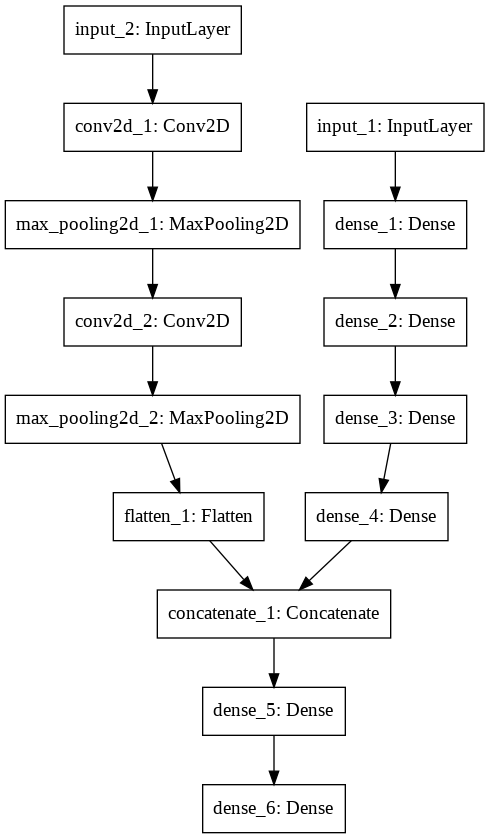

In [0]:
merge = concatenate([flat, output])
hidden1 = Dense(10, activation='relu')(merge)
output1 = Dense(1, activation='linear')(hidden1)
model = Model(inputs=[visible,visible1], outputs=output1)

# summarize layers
print(model.summary())
# plot graph
plot_model(model, to_file='shared_input_layer.png')

In [0]:
from tensorflow.keras.callbacks import EarlyStopping
model.compile(loss='mean_squared_error', optimizer='adam', metrics = ['accuracy'])
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')

In [0]:
model.fit([xtrain,conxtrain],ytrain,validation_data=([xtest,conxtest], ytest),verbose=2,epochs=100,callbacks=[monitor])




Train on 362 samples, validate on 91 samples
Epoch 1/100





 - 18s - loss: 202417905449.0166 - acc: 0.0000e+00 - val_loss: 32376137728.0000 - val_acc: 0.0000e+00
Epoch 2/100
 - 17s - loss: 68552224292.7735 - acc: 0.0000e+00 - val_loss: 51163184364.3077 - val_acc: 0.0000e+00
Epoch 3/100
 - 17s - loss: 65280332160.7072 - acc: 0.0000e+00 - val_loss: 38215889863.7363 - val_acc: 0.0000e+00
Epoch 4/100
 - 17s - loss: 60880078519.8674 - acc: 0.0000e+00 - val_loss: 33646961135.1209 - val_acc: 0.0000e+00
Epoch 5/100
 - 17s - loss: 60105968419.3591 - acc: 0.0000e+00 - val_loss: 34051730420.7473 - val_acc: 0.0000e+00
Epoch 6/100
 - 17s - loss: 59455728125.1713 - acc: 0.0000e+00 - val_loss: 37243659320.2637 - val_acc: 0.0000e+00
Epoch 00006: early stopping


In [0]:
pred = model.predict([xtest,conxtest])
score = np.sqrt(metrics.mean_squared_error(pred,ytest))
print("Score (RMSE): {}".format(score))

Score (RMSE): 192986.16727330833


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
print("Regression Lift Chart")
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

Regression Lift Chart


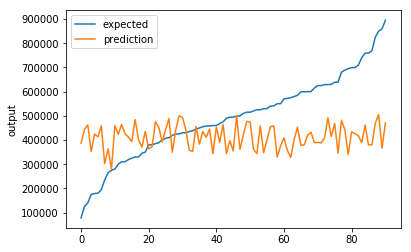

In [0]:
chart_regression(pred.flatten(),ytest)